<a href="https://colab.research.google.com/github/ddezouza/Data110/blob/main/DanielaMelo_Data110_Week5_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uncovering Insights from the Titanic Dataset

### Loading the Dataset

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
titanic = sns.load_dataset('titanic')
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Task 1: Dataset Overview

The titanic dataset contains information about the passengers of HMS Titanic, which sunk in 1912 resulting in great loss of life. It contains 14 variables for 890 passengers - including age, sex, whether they survived or not, whether they were travelling with family members such as siblings, parents, children or spouses, as well as how much they paid for their tickets and what passenger class they belonged to, and where they embarked the ship.

#### Variables:
Variable 'survived' indicates in a binary format whether the passenger survived the disaster (1) or not (0), and is mirrored by variable 'alive'which transmits the same information as 'yes' or 'no'.

pclass indicates which passenger class (from 1 to 3) the passenger belonged to, mirrored in column 'class' which describes the same information in text format,  while 'fare' gives the cost paid by the passenger to embark on the ship. sibsp and parch can be used to determine how many family members each passenger had on board, as they correspond to the number of siblings and/or spouses and parents and/or children respectively.

A lot of information is duplicated in different forms in the dataset - the town where each passenger embarked is recorded both as variable 'embarked', coded as the single letter initial for each town, and in embark_town using the full name for each town.

The sex and age of each passenger is recorded in columns 'who' and 'age' respectively.



### Task 2: Fare Distribution

In [17]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


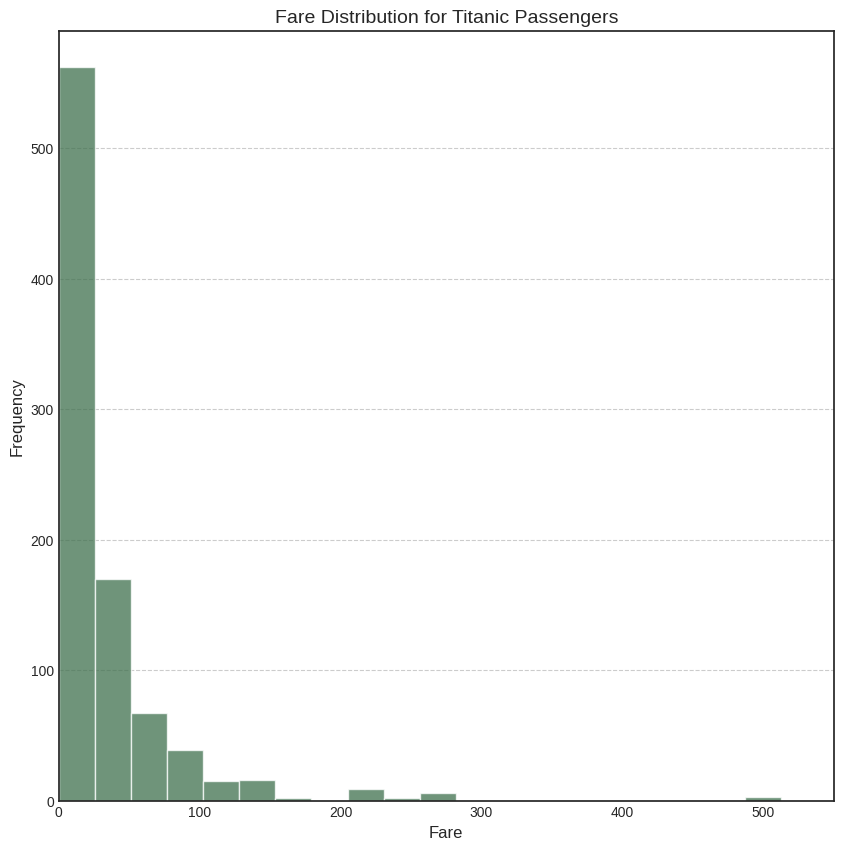

In [37]:
plt.style.use('seaborn-v0_8-white')
plt.figure(figsize=(10,10))
plt.hist(titanic['fare'],
         bins=20,
         color='#3F704D',
         alpha=.75,
         zorder=2,
         edgecolor='white')
plt.grid(axis='y',
         linestyle='--',
         zorder=0)
plt.xlabel('Fare',
           fontsize=12)
plt.ylabel('Frequency',
           fontsize=12)
plt.title('Fare Distribution for Titanic Passengers',
          fontsize=14)
plt.xlim(0,550)
ax = plt.gca()
ax.tick_params(axis='x',
               labelsize=10)
ax.tick_params(axis='y',
               labelsize=10)
plt.show()

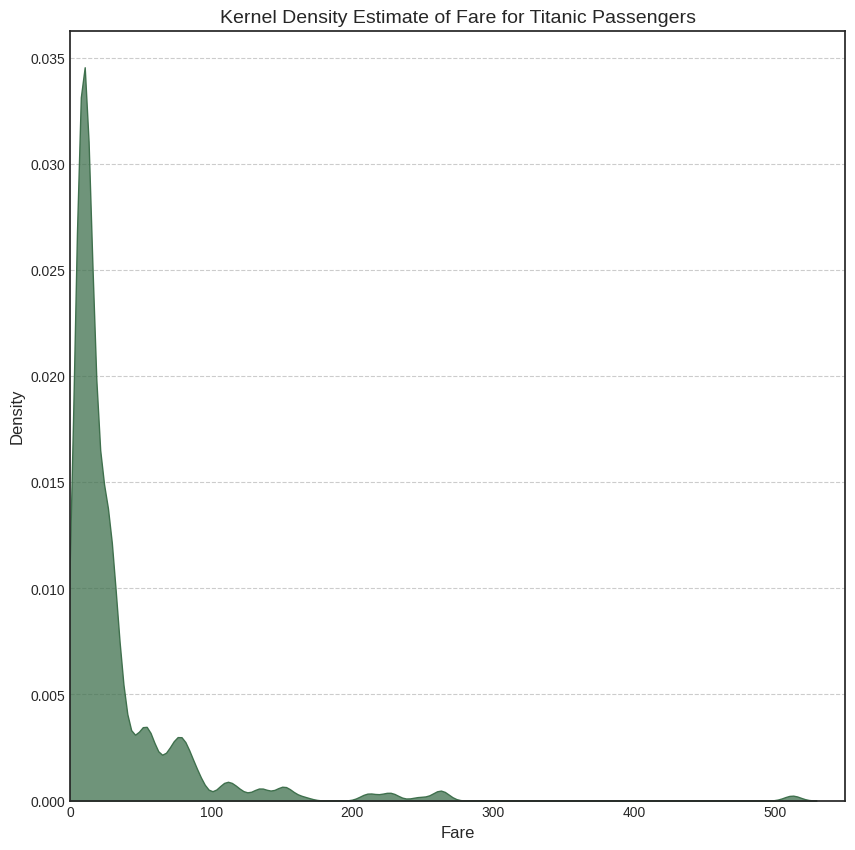

In [39]:
plt.figure(figsize=(10,10))
sns.kdeplot(titanic['fare'],
            fill=True,
            color='#3F704D',
            alpha=.75,
            bw_adjust=.45)
plt.xlim(0,550)
plt.xlabel('Fare',
           fontsize=12)
plt.ylabel('Density',
           fontsize=12)
plt.title('Kernel Density Estimate of Fare for Titanic Passengers',
          fontsize=14)
ax.tick_params(axis='x',
               labelsize=10)
ax.tick_params(axis='y',
               labelsize=10)
plt.grid(axis='y',
         linestyle='--',
         zorder=0)
plt.show()

#### Comments:
The vast majority of passengers paid very low prices for their tickets. We see a long right tail, with a little bump of outliers with fares above 500. It is well known that a much greater proportion of third class passengers died in the Titanic, so it is highly likely that lower fares correspond to lower survival rates.

### Task 3: Fare and Survival Rates

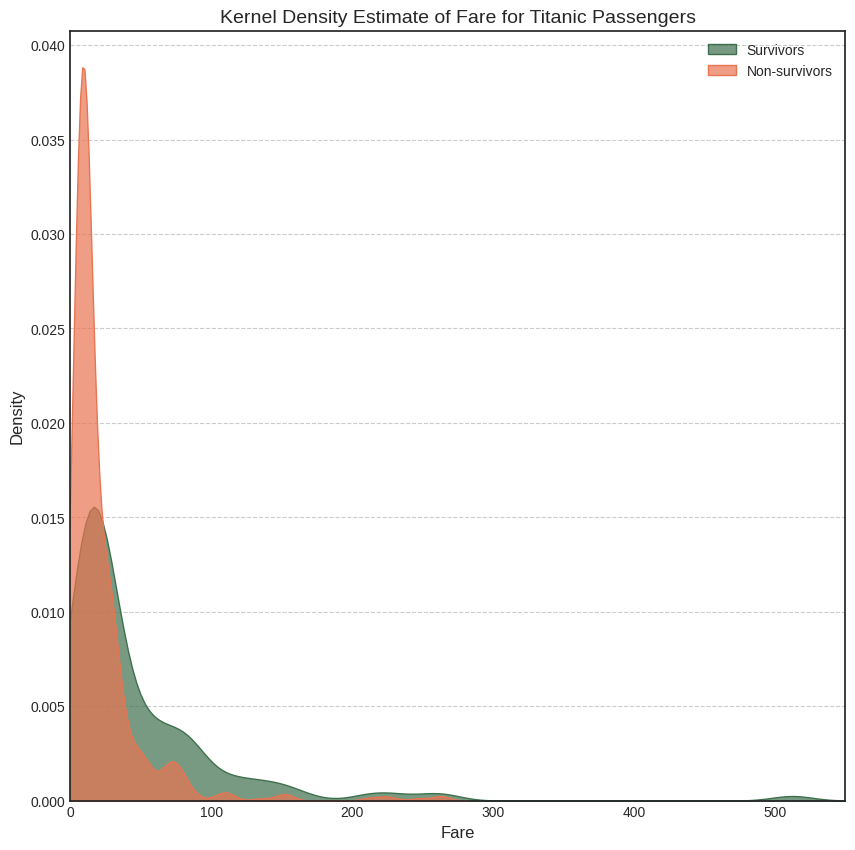

In [53]:
fares_lived=titanic[titanic['alive']=='yes']['fare']
fares_died=titanic[titanic['alive']=='no']['fare']
plt.figure(figsize=(10,10))
sns.kdeplot(fares_lived, bw_adjust=0.7, fill=True, color="#3F704D", alpha=0.7, label='Survivors')
sns.kdeplot(fares_died, bw_adjust=0.7, fill=True, color="#E97451", alpha=0.7, label='Non-survivors')
plt.xlim(0,550)
plt.xlabel('Fare',
           fontsize=12)
plt.ylabel('Density',
           fontsize=12)
plt.title('Kernel Density Estimate of Fare for Titanic Passengers',
          fontsize=14)
ax.tick_params(axis='x',
               labelsize=10)
ax.tick_params(axis='y',
               labelsize=10)
plt.grid(axis='y',
         linestyle='--',
         zorder=0)
plt.legend()
plt.show()

### Comments:
As expected, the distribution of non-survivors has a greater peak at the lowest fare values. The distribution for non-survivors completely excludes the group of outliers with fares valued at 500. The richest passengers were the most likely to survive in the Titanic disaster.

### Task 4: Passenger Class, Fare, and Survival

In [30]:
FClass=titanic[titanic['pclass']==1][['fare','alive']]
SClass=titanic[titanic['pclass']==2][['fare','alive']]
TClass=titanic[titanic['pclass']==3][['fare','alive']]
FClass.head()

,fare,alive
1,71.2833,yes
3,53.1000,yes
6,51.8625,no
11,26.5500,yes
23,35.5000,yes


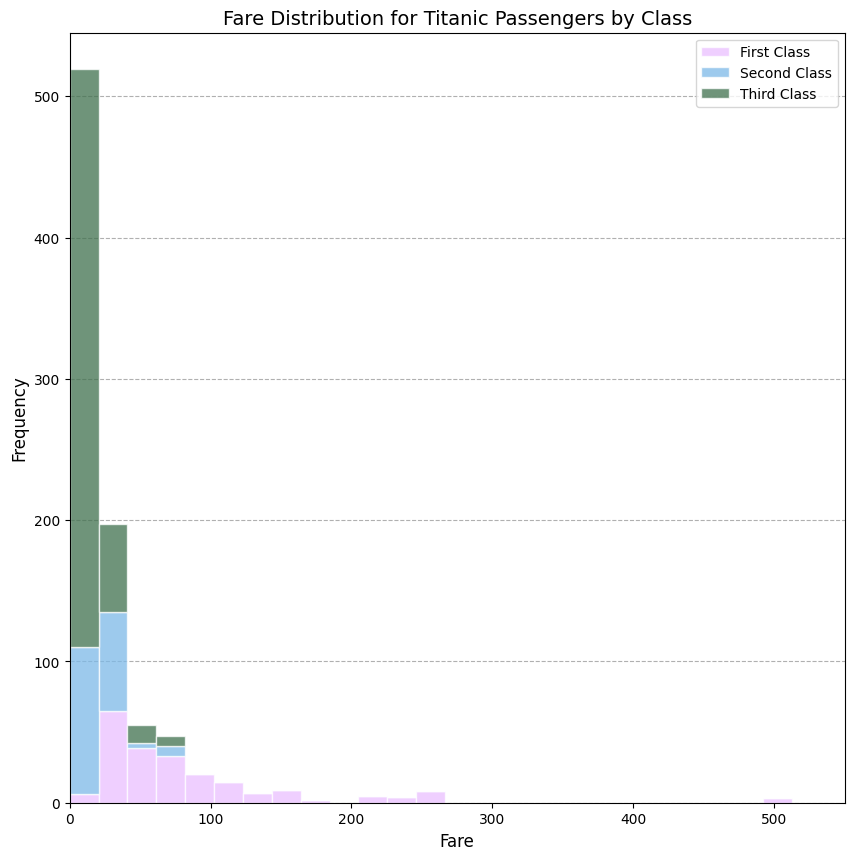

In [35]:
plt.figure(figsize=(10,10))
colors=['#eabfff','#7CB9E8','#3F704D']
plt.hist([FClass['fare'],SClass['fare'],TClass['fare']],
         bins=25,
         color=['#eabfff','#7CB9E8','#3F704D'],
         label=['First Class','Second Class','Third Class'],
         stacked=True,
         alpha=.75,
         edgecolor='white',
         zorder=2)
plt.grid(axis='y',
         linestyle='--',
         zorder=0)
plt.xlabel('Fare',
           fontsize=12)
plt.ylabel('Frequency',
           fontsize=12)
plt.title('Fare Distribution for Titanic Passengers by Class',
          fontsize=14)
plt.xlim(0,550)
ax = plt.gca()
ax.tick_params(axis='x',
               labelsize=10)
ax.tick_params(axis='y',
               labelsize=10)
plt.legend()
plt.show()

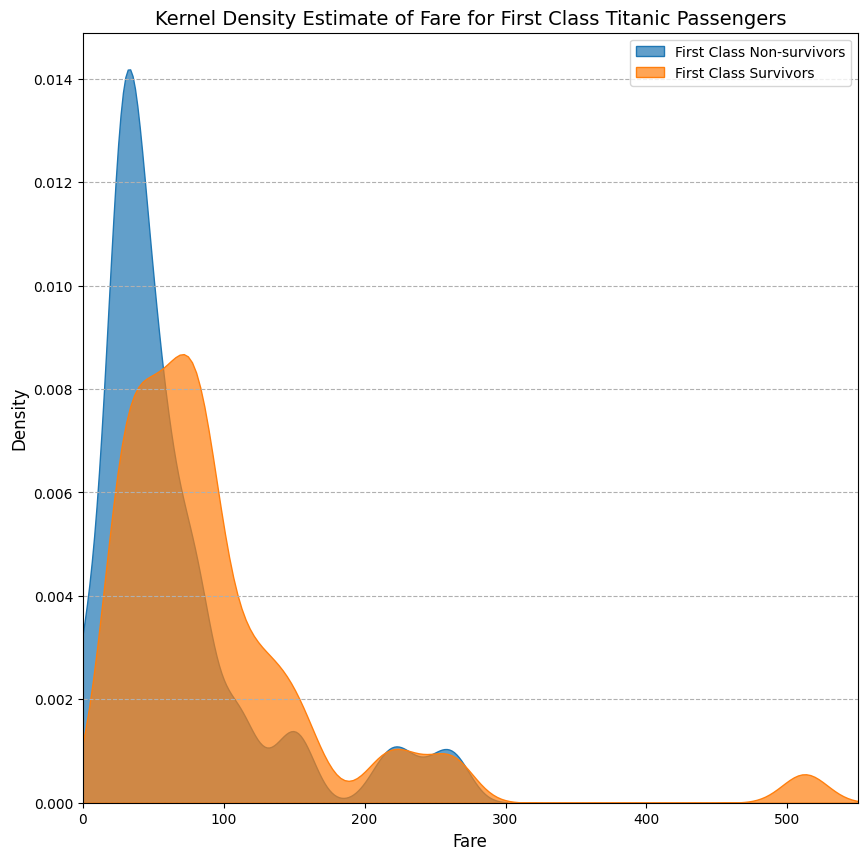

In [42]:
plt.figure(figsize=(10,10))
sns.kdeplot(FClass[FClass['alive']=='no']['fare'], bw_adjust=0.5, fill=True, alpha=0.7, label='First Class Non-survivors')
sns.kdeplot(FClass[FClass['alive']=='yes']['fare'], bw_adjust=0.5, fill=True, alpha=0.7, label='First Class Survivors')
plt.xlim(0,550)
plt.xlabel('Fare',
           fontsize=12)
plt.ylabel('Density',
           fontsize=12)
plt.title('Kernel Density Estimate of Fare for First Class Titanic Passengers',
          fontsize=14)
ax.tick_params(axis='x',
               labelsize=10)
ax.tick_params(axis='y',
               labelsize=10)
plt.grid(axis='y',
         linestyle='--',
         zorder=0)
plt.legend()
plt.show()

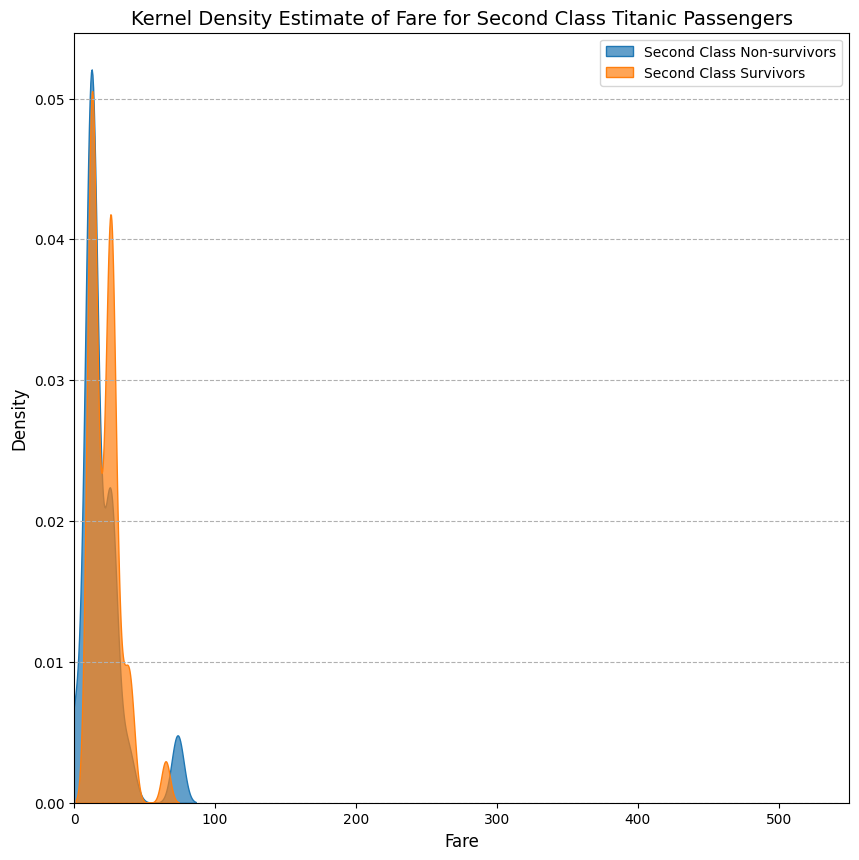

In [43]:
plt.figure(figsize=(10,10))
sns.kdeplot(SClass[SClass['alive']=='no']['fare'], bw_adjust=0.7, fill=True, alpha=0.7, label='Second Class Non-survivors')
sns.kdeplot(SClass[SClass['alive']=='yes']['fare'], bw_adjust=0.7, fill=True, alpha=0.7, label='Second Class Survivors')
plt.xlim(0,550)
plt.xlabel('Fare',
           fontsize=12)
plt.ylabel('Density',
           fontsize=12)
plt.title('Kernel Density Estimate of Fare for Second Class Titanic Passengers',
          fontsize=14)
ax.tick_params(axis='x',
               labelsize=10)
ax.tick_params(axis='y',
               labelsize=10)
plt.grid(axis='y',
         linestyle='--',
         zorder=0)
plt.legend()
plt.show()

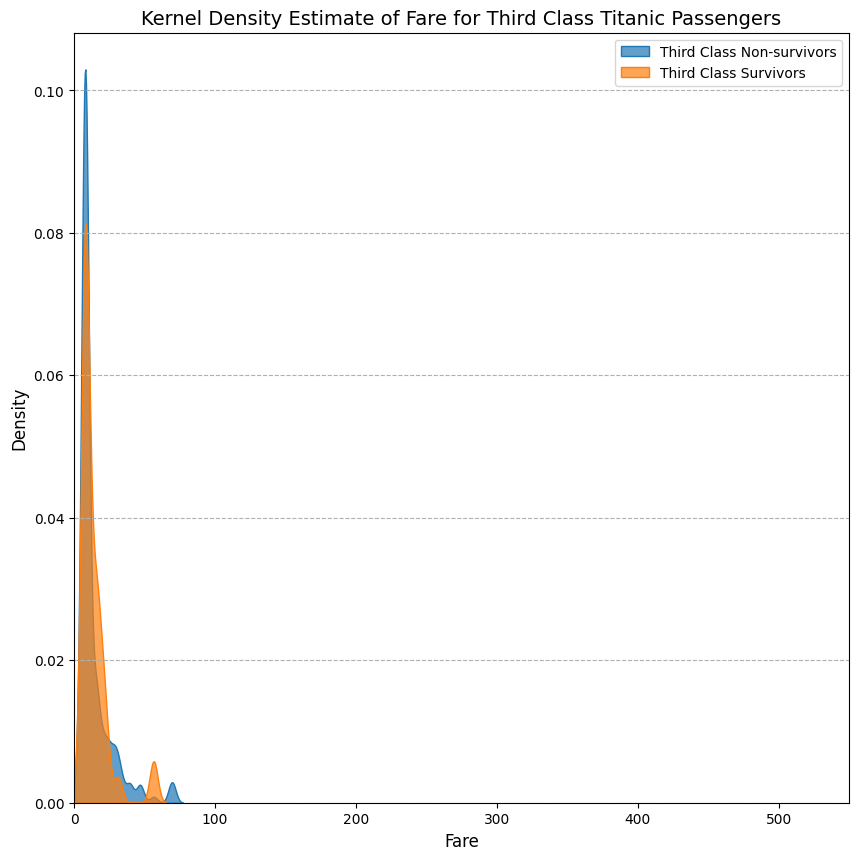

In [44]:
plt.figure(figsize=(10,10))
sns.kdeplot(TClass[TClass['alive']=='no']['fare'], bw_adjust=0.7, fill=True, alpha=0.7, label='Third Class Non-survivors')
sns.kdeplot(TClass[TClass['alive']=='yes']['fare'], bw_adjust=0.7, fill=True, alpha=0.7, label='Third Class Survivors')
plt.xlim(0,550)
plt.xlabel('Fare',
           fontsize=12)
plt.ylabel('Density',
           fontsize=12)
plt.title('Kernel Density Estimate of Fare for Third Class Titanic Passengers',
          fontsize=14)
ax.tick_params(axis='x',
               labelsize=10)
ax.tick_params(axis='y',
               labelsize=10)
plt.grid(axis='y',
         linestyle='--',
         zorder=0)
plt.legend()
plt.show()

### Comments:
When looking at Fares, Class, and Survival, we see First Class passengers that  paid higher fares were more likely to have survived than First Class passengers that paid lower fares. This relationship was not as distinct in second class, where there is a significant grouping of non-survivors around the 90 fare value, greater than the grouping for similar fares of survivors for that fare, a phenomenon that repeats in Third Class for a similar fare value, though in Third class it is clear that a majority of non-survivors were at a very low fare point.

### Task 5: Ages of Survivors and Non-survivors

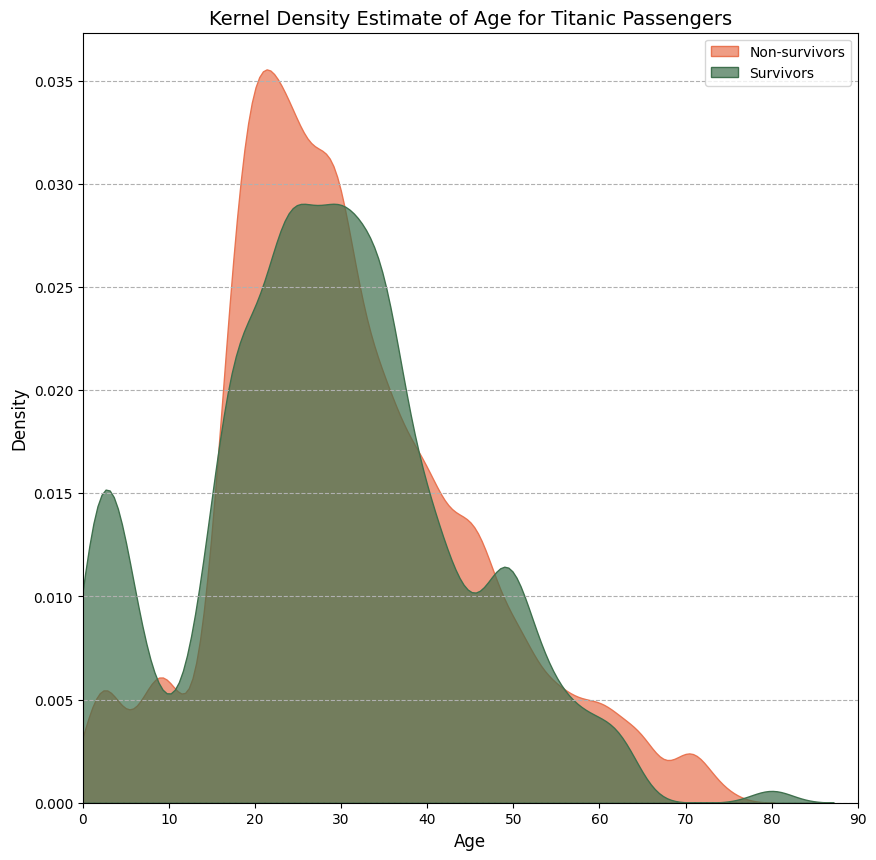

In [50]:
plt.figure(figsize=(10,10))
sns.kdeplot(titanic[titanic['alive']=='no']['age'], bw_adjust=0.5, color="#E97451", fill=True, alpha=0.7, label='Non-survivors')
sns.kdeplot(titanic[titanic['alive']=='yes']['age'], bw_adjust=0.5, color="#3F704D", fill=True, alpha=0.7, label='Survivors')
plt.xlim(0,90)
plt.xlabel('Age',
           fontsize=12)
plt.ylabel('Density',
           fontsize=12)
plt.title('Kernel Density Estimate of Age for Titanic Passengers',
          fontsize=14)
ax.tick_params(axis='x',
               labelsize=10)
ax.tick_params(axis='y',
               labelsize=10)
plt.grid(axis='y',
         linestyle='--',
         zorder=0)
plt.legend()
plt.show()

### Comments:
Ages for survivors have a peak between Age 0 and Age 10. This most likely corresponds to the children that were evacuated in lifeboats, as they received priority in boarding the same. 'Women and children first' had a clear impact in the survival data for the Titanic.

### Task 6: Pyramid Histogram for Age Survival by Sex

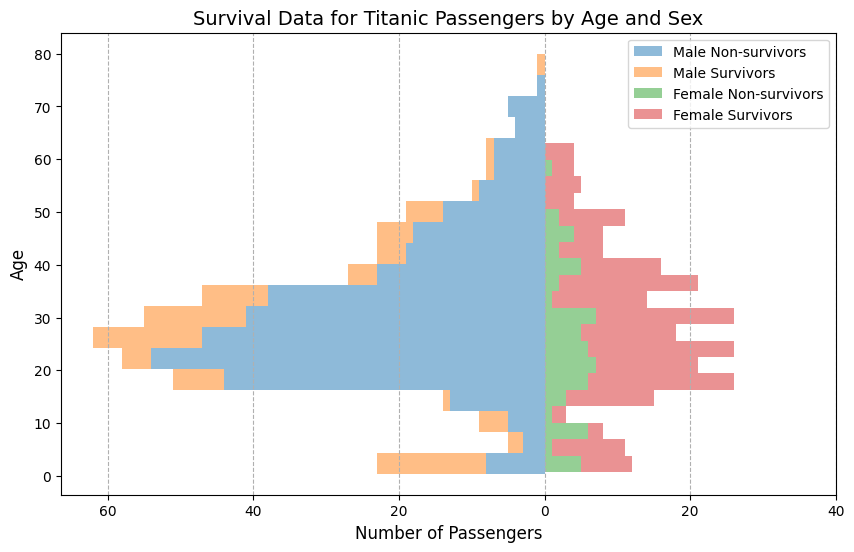

In [74]:
# Filter male and female ages, dropping NaN values
male = titanic[titanic['sex'] == 'male'][['age','alive']].dropna()
female = titanic[titanic['sex'] == 'female'][['age','alive']].dropna()
male_survivors=male[male['alive']=='yes']['age']
male_nonsurvivors=male[male['alive']=='no']['age']
female_survivors=female[female['alive']=='yes']['age']
female_nonsurvivors=female[female['alive']=='no']['age']
plt.figure(figsize=(10, 6))
plt.hist([male_nonsurvivors,male_survivors], bins=20, label=['Male Non-survivors','Male Survivors'], alpha=0.5, stacked=True, orientation='horizontal', weights=[[-1] * len(male_nonsurvivors),[-1]*len(male_survivors)])
plt.hist([female_nonsurvivors,female_survivors], bins=20, label=['Female Non-survivors','Female Survivors'], alpha=0.5, stacked=True, orientation='horizontal')
plt.xlabel('Number of Passengers',
           fontsize=12)
plt.ylabel('Age',
           fontsize=12)
plt.title('Survival Data for Titanic Passengers by Age and Sex',
          fontsize=14)
ax.tick_params(axis='x',
               labelsize=10)
ax.tick_params(axis='y',
               labelsize=10)
plt.grid(axis='x',
         linestyle='--',
         zorder=0)
plt.xticks([-60, -40, -20, 0, 20, 40], [60, 40, 20, 0, 20, 40])
plt.legend()
plt.show()

### Comments:
It is clear when we split the survival data by sex that men were much more likely to have died in the Titanic than women.

### Task 7: Bar Graph, Line Plot, and Scatter Plot

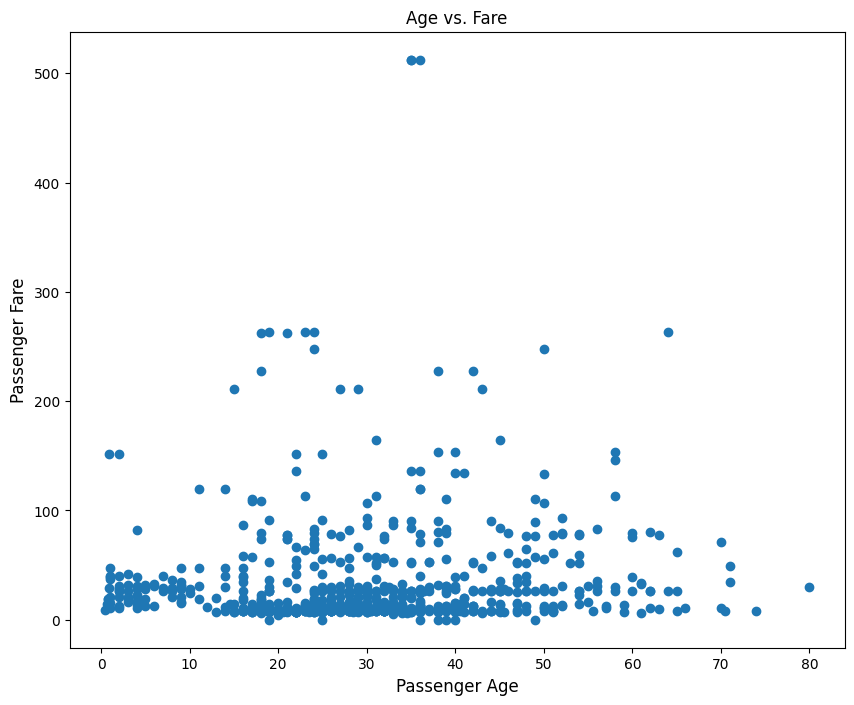

In [84]:
plt.figure(figsize=(10,8))
plt.scatter(titanic['age'],titanic['fare'],marker='o')
plt.title('Age vs. Fare')
plt.xlabel('Passenger Age',
           fontsize=12)
plt.ylabel('Passenger Fare',
           fontsize=12)
plt.show()

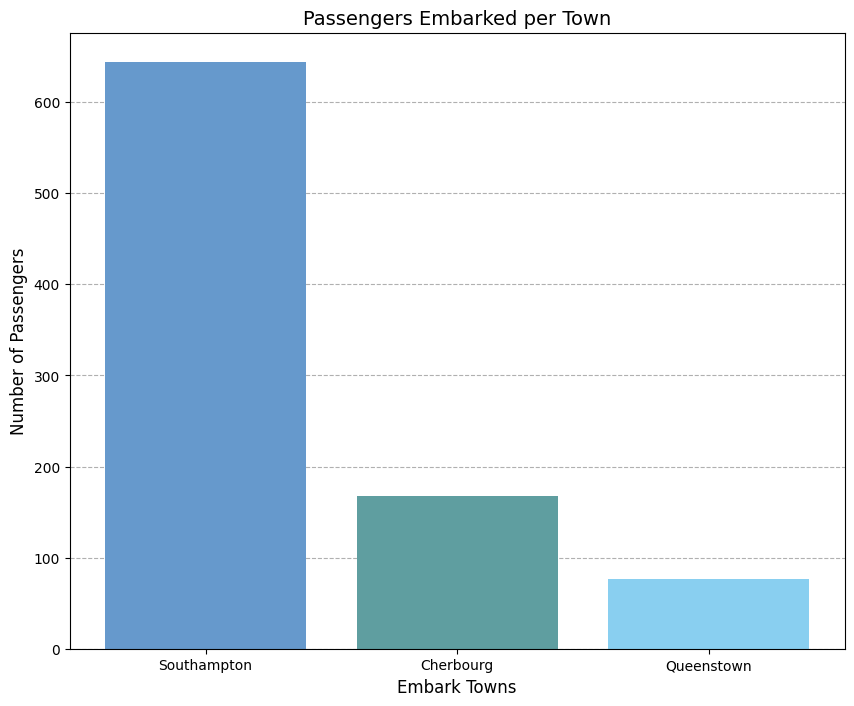

In [90]:
Southampton=titanic[titanic['embark_town']=='Southampton'][['age','pclass','alive']]
Cherbourg=titanic[titanic['embark_town']=='Cherbourg'][['age','pclass','alive']]
Queenstown=titanic[titanic['embark_town']=='Queenstown'][['age','pclass','alive']]
Towns=['Southampton','Cherbourg','Queenstown']
Values=[Southampton['alive'].count(),Cherbourg['alive'].count(),Queenstown['alive'].count()]
plt.figure(figsize=(10, 8))
plt.bar(Towns, Values, color=['#6699CC','#5F9EA0','#89CFF0'],zorder=2)
plt.title('Passengers Embarked per Town', fontsize=14)
plt.xlabel('Embark Towns',fontsize=12)
plt.ylabel('Number of Passengers',fontsize=12)
plt.grid(axis='y',linestyle='--',zorder=0)
ax = plt.gca()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.show()